In [1]:
# Import the necessary libraries
from qiskit import QuantumCircuit, transpile, Aer, execute
import matplotlib.pyplot as plt
import random
import pandas as pd


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [31]:
nr_qubits = 6
control_qubit = 0

# Create an empty DataFrame with columns for measurement basis and result
df = pd.DataFrame(columns=["Measurement Basis", "Measured Result"])

In [46]:

# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(nr_qubits)

def initialize_all_zeros(nr_qubits):
    # Create a quantum circuit with N qubits
    qc = QuantumCircuit(nr_qubits)
    
    # Initialize all qubits in the |0⟩ state
    for qubit in range(nr_qubits):
        qc.initialize([1, 0], qubit)
    
    return qc

def apply_cnot_chain(qc, control_qubit, nr_qubits):
    # Apply CNOT gates from the control qubit to the list of target qubits
    for target_qubit in range(nr_qubits-1):
        qc.cx(control_qubit, target_qubit+1)




qc = initialize_all_zeros(nr_qubits)
# Apply a Hadamard gate to qubit 0
qc.h(control_qubit)
apply_cnot_chain(qc, control_qubit, nr_qubits)



def random_measurement_basis(nr_qubits):
    measurement_basis = ['x', 'y', 'z']
    return [random.choice(measurement_basis) for _ in range(nr_qubits)]


measurement_bases = random_measurement_basis(nr_qubits)
print(measurement_bases)


for qubit in range(nr_qubits):
    # print('start', qubit)
    if measurement_bases[qubit] == 'x':
        qc.h(qubit)
        # print('qubit x', qubit)
    elif measurement_bases[qubit] == 'y':
        qc.sdg(qubit)
        qc.h(qubit)
        # print('qubit y', qubit)




# Add measurements for all qubits in the Z basis
qc.measure_all()

# Simulate the circuit and get measurement results
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1)
result = job.result()
counts = result.get_counts(qc)

# Iterate through the qubits and add their measurement results to the DataFrame
# measurement_bases = random_measurement_basis(nr_qubits)
# for qubit in range(nr_qubits):
#     basis = measurement_bases[qubit]
#     result = int(list(counts.keys())[0][nr_qubits - 1 - qubit])  # Extract the result
#     df = pd.concat([df, pd.DataFrame({"Measurement Basis": [basis], "Measured Result": [result]})])

# Display the DataFrame
# print(df)


# Initialize a list to store the rows
rows = []

# Iterate through the qubits and add their measurement results to the list
for qubit in range(nr_qubits):
    basis = measurement_bases[qubit]
    result = int(list(counts.keys())[0][nr_qubits - 1 - qubit])  # Extract the result
    rows.append(pd.DataFrame({"Measurement Basis": [basis], "Measured Result": [result]}))

# Concatenate the rows into the DataFrame and reset the index
df = pd.concat(rows, ignore_index=True)

# Display the DataFrame
print(df)






['z', 'x', 'x', 'z', 'z', 'y']
  Measurement Basis  Measured Result
0                 z                1
1                 x                0
2                 x                1
3                 z                1
4                 z                1
5                 y                1


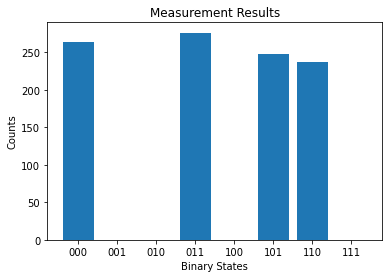

In [29]:


# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# Initialize all qubits in the |0⟩ state
qc.initialize([1, 0], 0)  # Initialize qubit 0 in |0⟩
qc.initialize([1, 0], 1)  # Initialize qubit 1 in |0⟩
qc.initialize([1, 0], 2)  # Initialize qubit 2 in |0⟩

# Apply a Hadamard gate to qubit 0
qc.h(0)

# Apply CNOT gates from qubit 0 to qubits 1 and 2
qc.cx(0, 1)  # CNOT from qubit 0 to qubit 1
qc.cx(0, 2)  # CNOT from qubit 0 to qubit 2

# Measure all qubits in the X-axis (Hadamard basis)
qc.h(0)
qc.h(1)
qc.h(2)

# Add measurements to the circuit
qc.measure_all()
qc.draw(output='mpl')
plt.show()


# Simulate the circuit and get measurement results
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)  # You can adjust the number of shots
result = job.result()
counts = result.get_counts(qc)

# Create a list of binary state labels
state_labels = [format(i, '03b') for i in range(8)]

# Extract the counts in the order of the state labels
state_counts = [counts.get(label, 0) for label in state_labels]

# Create a bar chart with x-axis labels
plt.bar(state_labels, state_counts)
plt.xlabel('Binary States')
plt.ylabel('Counts')
plt.title('Measurement Results')
plt.show()


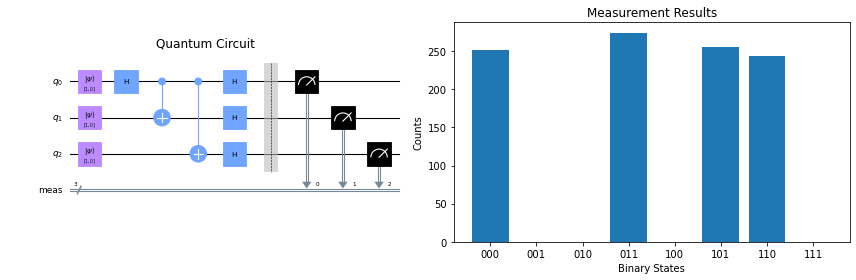

In [30]:
# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# Initialize all qubits in the |0⟩ state
qc.initialize([1, 0], 0)  # Initialize qubit 0 in |0⟩
qc.initialize([1, 0], 1)  # Initialize qubit 1 in |0⟩
qc.initialize([1, 0], 2)  # Initialize qubit 2 in |0⟩

# Apply a Hadamard gate to qubit 0
qc.h(0)

# Apply CNOT gates from qubit 0 to qubits 1 and 2
qc.cx(0, 1)  # CNOT from qubit 0 to qubit 1
qc.cx(0, 2)  # CNOT from qubit 0 to qubit 2

# Measure all qubits in the X-axis (Hadamard basis)
qc.h(0)
qc.h(1)
qc.h(2)

# Add measurements to the circuit
qc.measure_all()

# Simulate the circuit and get measurement results
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)  # You can adjust the number of shots
result = job.result()
counts = result.get_counts(qc)

# Create a list of binary state labels
state_labels = [format(i, '03b') for i in range(8)]

# Extract the counts in the order of the state labels
state_counts = [counts.get(label, 0) for label in state_labels]

# Create a subplot with two plots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the circuit diagram
axs[0].set_title("Quantum Circuit")
qc.draw(output='mpl', ax=axs[0])

# Plot the histogram with x-axis labels
axs[1].set_title("Measurement Results")
axs[1].bar(state_labels, state_counts)
axs[1].set_xlabel('Binary States')
axs[1].set_ylabel('Counts')

# Adjust spacing between subplots
plt.tight_layout()

# Show both plots
plt.show()
